In [11]:
import requests
from bs4 import BeautifulSoup
from wordcloud import WordCloud
from textblob import TextBlob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
url = 'https://techcrunch.com/'
headers = {'User-Agent': 'Mozilla/5.0'}
response = requests.get(url, headers=headers)

In [13]:
if response.status_code == 200:
    print("Data successfully retrieved.")
else:
    print("Failed to retrieve data.")

Data successfully retrieved.


In [15]:
soup = BeautifulSoup(response.content, 'html.parser')

In [16]:
print("Page Title:", soup.title.text)

Page Title: TechCrunch | Startup and Technology News


In [17]:
articles = soup.find_all('h2')
headlines = []
links = []

for article in articles:
    headline = article.text.strip()
    link = article.find('a')['href'] if article.find('a') else 'No link available'
    headlines.append(headline)
    links.append(link)

In [18]:
print("\nFirst 10 Headlines:")
for i, headline in enumerate(headlines[:10]):
    print(f"{i+1}. {headline}")


First 10 Headlines:
1. Latest News
2. Most Popular
3. Storylines
4. Upcoming Events
5. Startups
6. How to make something of Nothing with Nothing CEO Carl Pei
7. AI
8. Security
9. Venture
10. Apps


In [19]:
df = pd.DataFrame({'Headline': headlines, 'Link': links})

In [20]:
print("\nFirst 5 Rows of DataFrame:")
print(df.head())


First 5 Rows of DataFrame:
          Headline               Link
0      Latest News  No link available
1     Most Popular  No link available
2       Storylines  No link available
3  Upcoming Events  No link available
4         Startups  No link available


In [22]:
def classify_headline(headline):
    if 'startup' in headline.lower():
        return 'Startup'
    elif 'ai' in headline.lower():
        return 'AI'
    elif 'tech' in headline.lower():
        return 'Tech'
    elif 'crypto' in headline.lower():
        return 'Crypto'
    else:
        return 'Other'

In [23]:
df['Category'] = df['Headline'].apply(classify_headline)

In [24]:
category_counts = df['Category'].value_counts()
print("\nCategory Distribution:")
print(category_counts)


Category Distribution:
Category
Other      11
Startup     1
AI          1
Name: count, dtype: int64


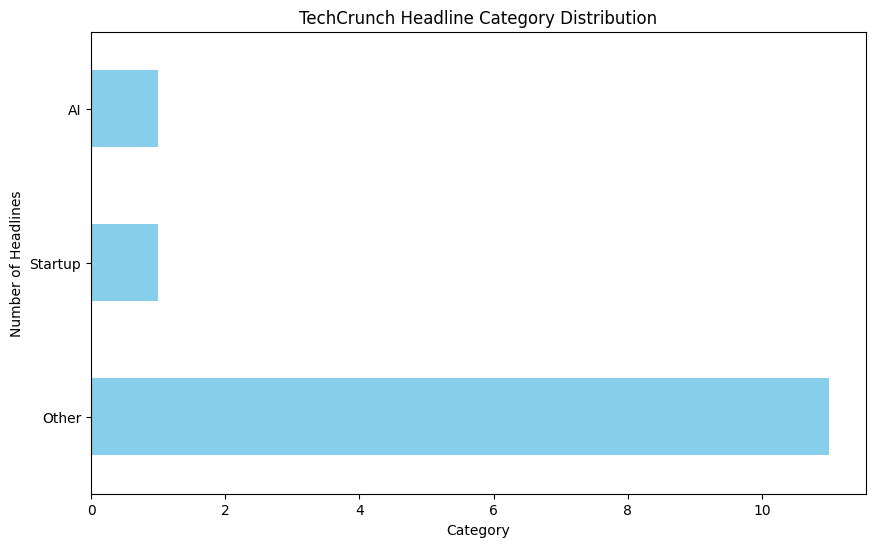

In [25]:
plt.figure(figsize=(10, 6))
category_counts.plot(kind='barh', color='skyblue')
plt.title('TechCrunch Headline Category Distribution')
plt.xlabel('Category')
plt.ylabel('Number of Headlines')
plt.xticks(rotation=0)
plt.show()

In [26]:
#WordCloud
all_headlines = ' '.join(df['Headline'])
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(all_headlines)

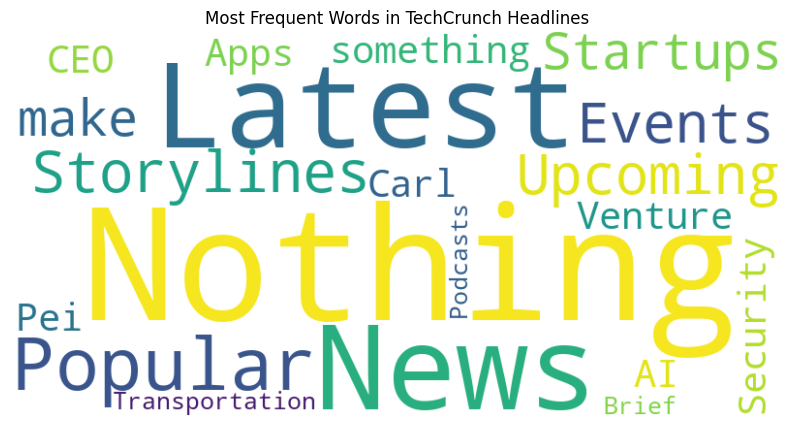

In [27]:
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequent Words in TechCrunch Headlines')
plt.show()